<a href="https://colab.research.google.com/github/amitupreti/sentiment-analysis-from-scratch-With-Numpy/blob/master/Part_1_sentiment_analysis_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Reading the reviews and Label

In [ ]:
!

In [1]:
with open('reviews.txt','r') as f:
    reviews_raw = f.read().splitlines()
with open('labels.txt','r') as f:
    labels_raw = f.read().upper().splitlines()

print('------'*2+'Review1'+'-----'*2)
print(reviews_raw[0])

print('\n'+'------'*2+'Label1'+'-----'*2)
print(labels_raw[0])

------------Review1----------
bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   

------------Label1----------
POSITIVE


In [2]:
#### A function to preety print review and label

def pretty_print_review_and_label(index):
    print(f'{labels_raw[index]}\t:\t{reviews_raw[index][:80]} ...')

In [3]:
pretty_print_review_and_label(1)
pretty_print_review_and_label(100)
pretty_print_review_and_label(1401)
pretty_print_review_and_label(10000)

NEGATIVE	:	story of a man who has unnatural feelings for a pig . starts out with a opening  ...
POSITIVE	:	i find it so amazing that even after all these years  we are still talking about ...
NEGATIVE	:	when i was   i saw the documentary  a funny thing happened on the way to the moo ...
POSITIVE	:	another one for the babes  bullets crowd . the story is much edgier than any oth ...


### 1.1 Develop A predictive Theory

###### Here we are supposed to check the dataset and try to figure out what makes the review postive or negative. Looking at few samples an idea that seems likely is that positive reviews  have more number of positive words such as "great","amazing","loved" and negative reviews have more number of negative words such as "hate","terrible"



### 1.2 Validating our Theory

##### Here we will create two dictionary which will contain the frequency of each word in positive and negative review
1. positive_counts 
2. negatice_counts

also a third dictionary(total_counts) to hold count of all the words


In [4]:
from collections import Counter
import numpy as np

In [8]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

for i,curr_label in enumerate(labels_raw):
    curr_review = reviews_raw[i]
    for word in curr_review.split(" "):
        if curr_label == 'POSITIVE':
            positive_counts[word] += 1
        elif curr_label == 'NEGATIVE':
            negative_counts[word] += 1
        total_counts[word] += 1
    
        

Lets view the most common words in our postive and negative reviews.m

In [9]:
positive_counts.most_common(20)

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937)]

In [10]:
negative_counts.most_common(20)

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878)]

In [11]:
## we can see that the most repeated words are "the", ".", "to"  etc 
#which might not best reflect the sentiment of the review

## so now we will try to find words that appear more often on positive reviews than negative reviews and vice versa
#to accomplish this, you'll need to calculate the ratios of word usage between positive and negative reviews.

In [12]:
pos_neg_ratios = Counter()
for word,count in total_counts.items():
    if count >100: # considering words that are at least repeated 100 times
        pos_neg_ratios[word] = positive_counts[word]/(1+negative_counts[word])

In [13]:
# pos_neg_ratios

In [14]:
print(f'Positive to negative ratio for word "the" {pos_neg_ratios["the"]}')
print(f'Positive to negative ratio for word "amazing" {pos_neg_ratios["amazing"]}')
print(f'Positive to negative ratio for word "terrible" {pos_neg_ratios["terrible"]}')

Positive to negative ratio for word "the" 1.0607993145235326
Positive to negative ratio for word "amazing" 4.022813688212928
Positive to negative ratio for word "terrible" 0.17744252873563218


In [15]:
## we can see that the words which we expect to be positive have higher  positive to negative values than 1 and the words which we expect
## to be negative have values close to 0
## and the words that mostly donot convey sentiments have value close to 1

## This kind of validates our theory

### this positive to negative ratio can be an estimate for us to tell if the word is positive or negative

In [16]:
pos_neg_ratios['bad']

0.2576330721426641

In [17]:
pos_neg_ratios['love']

1.9976776590803529

Looking closely at the values you just calculated, we see the following:

* Words that you would expect to see more often in positive reviews – like "amazing" – have a ratio greater than 1. The more skewed a word is toward postive, the farther from 1 its positive-to-negative ratio will be.
* Words that you would expect to see more often in negative reviews – like "terrible" – have positive values that are less than 1. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews – like "the" – have values very close to 1. A perfectly neutral word – one that was used in exactly the same number of positive reviews as negative reviews – would be almost exactly 1. The +1 we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anyway.

Ok, the ratios tell us which words are used more often in postive or negative reviews, but the specific values we've calculated are a bit difficult to work with. A very positive word like "amazing" has a value above 4, whereas a very negative word like "terrible" has a value around 0.18. Those values aren't easy to compare for a couple of reasons:

* Right now, 1 is considered neutral, but the absolute value of the postive-to-negative rations of very postive words is larger than the absolute value of the ratios for the very negative words. So there is no way to directly compare two numbers and see if one word conveys the same magnitude of positive sentiment as another word conveys negative sentiment. So we should center all the values around netural so the absolute value fro neutral of the postive-to-negative ratio for a word would indicate how much sentiment (positive or negative) that word conveys.
* When comparing absolute values it's easier to do that around zero than one.* 

In [18]:
## Now we will convert the rations to logarithm so that the values can be centered around zero

In [19]:
for word,value in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(value)

In [20]:
print(f'Positive to negative ratio for word "the" {pos_neg_ratios["the"]}')
print(f'Positive to negative ratio for word "amazing" {pos_neg_ratios["amazing"]}')
print(f'Positive to negative ratio for word "terrible" {pos_neg_ratios["terrible"]}')

Positive to negative ratio for word "the" 0.05902269426102881
Positive to negative ratio for word "amazing" 1.3919815802404802
Positive to negative ratio for word "terrible" -1.7291085042663878


In [21]:
## Here we can see neutral words have value close to zero
## negative words have negative values
## and postitive words have postivive values

In [22]:
pos_neg_ratios.most_common(30) ## top 30 positive words

[('edie', 4.6913478822291435),
 ('paulie', 4.07753744390572),
 ('felix', 3.152736022363656),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.80672172860924),
 ('victoria', 2.681021528714291),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.538973871058276),
 ('flawless', 2.451005098112319),
 ('superbly', 2.26002547857525),
 ('perfection', 2.159484249353372),
 ('astaire', 2.1400661634962708),
 ('captures', 2.038619547159581),
 ('voight', 2.030170492673053),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.978345424808467),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('soccer', 1.757857

In [23]:
pos_neg_ratios.most_common()[:-31:-1] # 30 most negative words

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('seagal', -3.644143560272545),
 ('unwatchable', -3.258096538021482),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.307572634505085),
 ('worst', -2.286987896180378),
 ('laughable', -2.264363880173848),
 ('awful', -2.227194247027435),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.204604684633842),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.995100393246085),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.987068221548821),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166),
 ('insult

## 2. Transforming Text into Numbers

We know that neural networks are just matrix multiplications and we can't perform these matrix multiplications on text data . so now we will have to convert the text input to numerical input

We will create a big 1d array of for all the words that we have from both positive and negative reviews.

so for each input, we will assign 1 to if that word is found in our big 1d array and leave others as zero

Also, for output we will use 0 to indicate negative sentiment and 1 to indicate positive sentiment

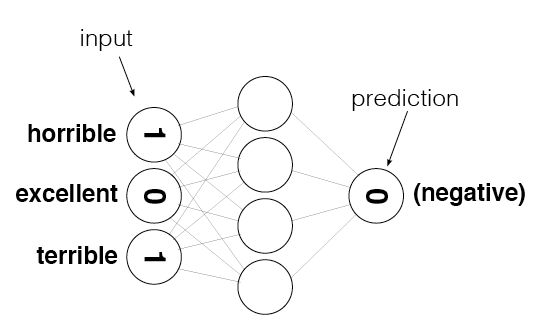

In [24]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

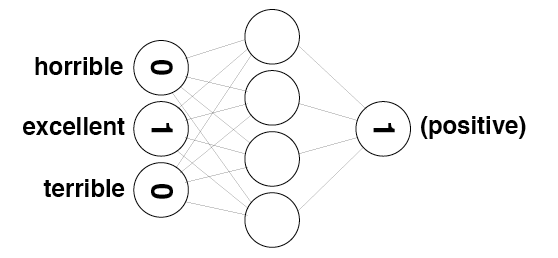

In [25]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

In [26]:
# llets create a set called vocab that lists all the words
vocab = set(total_counts.keys())
vocab_size = len(vocab)
vocab_size

74074

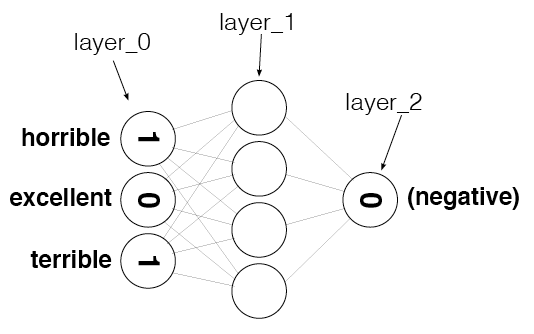

In [27]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

#Take a look at the following image. It represents the layers of the neural network you'll be building 
#throughout this notebook. layer_0 is the input layer, layer_1 is a hidden layer, 
#and layer_2 is the output layer.



In [28]:
# defining the first input layer for our neural network. this is of the size of our all the words in our data corpus
layer_0 = np.zeros((1,vocab_size))
layer_0.shape


(1, 74074)

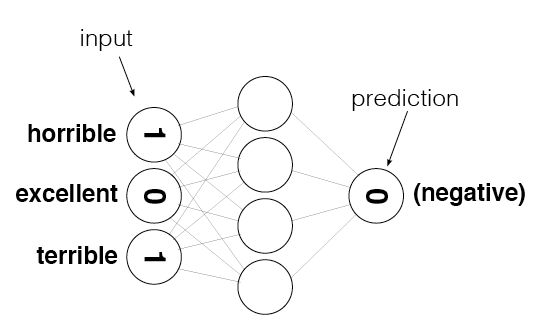

In [29]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [30]:
#now we will create a lookup dictionary that maps all the text in our data corpus to their position, so that we can lookup the index of every word
word2index = {}
for i,word in enumerate(vocab):
  word2index[word] = i



In [31]:
# viewing a slice of our word to index mapping
# https://stackoverflow.com/questions/7971618/python-return-first-n-keyvalue-pairs-from-dict
{k: word2index[k] for k in list(word2index)[:10]}

{'': 0,
 'purchased': 1,
 'bowlers': 2,
 'transitted': 3,
 'pain': 4,
 'caricature': 5,
 'hollering': 6,
 'srtikes': 7,
 'toyoko': 8,
 'skull': 9}

In [32]:
# update_input_layer function
'''

TODO: Complete the implementation of update_input_layer. It should count how many times each word is used in the given review, and then store those counts at the appropriate indices inside layer_0.
'''
def update_input_layer(review):

  """
  Modifies the global layer_0 to represent the vector form of  review.
  The element at a given index of layer_0 represents
  how many times the word has occured in the review.

  Args:
       review(string) -  the string of the review
  Returns:
       None
  """
  # why using global function not local function??/?
  global layer_0
  layer_0 *= 0 
  for word in review.split(' '):
    layer_0[0][word2index[word]] += 1

In [33]:
update_input_layer(reviews_raw[0])
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [34]:
def get_target_for_label(label):
  """
  Converrts a label to 0 or 1
  Args:
    label(string) - "POSITIVE" or NEGATIVE
  Returns:
     0 or 1
  """
  label = label.upper()
  if label == 'POSITIVE':
    return 1
  else:
    return 0

In [35]:
labels_raw[0]



'POSITIVE'

In [36]:
get_target_for_label(labels_raw[0])

1

# coding our neural network

In [37]:
import time
import sys
import numpy as np


class SentimentAnalysisNetwork:

    def __init__(self, reviews, labels, hidden_nodes=10, learning_rate=0.10):

        """
        Create a sentimentAnalysisNetwirk with the given settings.
        Args:
          reviews(list) - list of reviews to be used for training
          lables(list) - list of positive/negative labels associated with the given review
          hidden_nodes(int) -  number of nodes to create in hidden layer
          learning_rate(float) - learning rate to use for training(default = 0.10)

        """
        np.random.seed(1)

        # preprocess the reviews-> array and labels(convert positive->1 and negative->0)
        self.pre_process_data(reviews=reviews, labels=labels)

        # Buid the neural network with the above settings
        self.init_network(input_nodes=self.review_vocab_size, hidden_nodes=hidden_nodes, output_nodes=1,
                          learning_rate=learning_rate)

    def pre_process_data(self, reviews, labels):

        # populate review_vocab with all the words from given reviews. This would be a huge list
        review_vocab = set()
        for review in reviews:
            for word in review.split():
                review_vocab.add(word)

        # convert the review_vocab to set so that we can access word via index and create a mapping
        self.review_vocab = list(review_vocab)

        # populate label_vocab with all the labels
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)

        # convert the label_vocab to list so that we can access using indices
        self.label_vocab = list(label_vocab)

        # store the length of review and label vocab
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)

        # create a dictionary that will map all the words in self.vocab_review to their positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i

        # create a dictionary of labels mapped to index
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = 1

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        """
        Initializes the Neural Netowrk with the provided settings
        Args:
          input_nodes(int) - size of input node
          hidden_nodes(int) - size of hidden node
          output_nodes(int) - size of output_node
          learning_rate(float) - learning rate to train the neural network
        """

        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # store the learning rate
        self.learning_rate = learning_rate

        # initialize the weights between the input_layer and hidden_layer
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))

        # initialize the weights between hidden_node and
        # here loc  = mean, scale = standard deviation
        self.weights_1_2 = np.random.normal(loc=0.0, scale=self.hidden_nodes ** -0.5,
                                            size=(self.hidden_nodes, self.output_nodes))

        # the input layerm a two -dimensional matrix with 1 * input_nodes
        self.layer_0 = np.zeros((1, input_nodes))

    def update_input_layer(self, review):
        # clear out previous state, rest the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(' '):
            if word in self.word2index.keys():
                self.layer_0[0][self.word2index[word]] += 1

    def get_target_for_label(self, label):
        if label == 'POSITIVE':
            return 1
        else:
            return 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_output_2_derivative(self, output):
        return output * (1 - output)

    def train(self, training_reviews, training_labels):

        # make sure we have a matching number of reviews and labels
        assert (len(training_reviews) == len(training_labels))

        # keep track of correct predictions to display accuracy during training
        correct_so_far = 0

        # remember the time when we started time statistics
        start = time.time()

        # loop through alll the given reviews and run a forward pass and then backward pass
        # updating weights for every item
        for i in range(len(training_reviews)):

            # get the next review and its correct_label
            review = training_reviews[i]
            label = training_labels[i]

            #### forward pass
            self.update_input_layer(review)

            # hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)
            # output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            # ouput error
            layer_2_error = layer_2 - self.get_target_for_label(label)
            # output error is difference between desired output and actual output

            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)  # errors propagated to the hidden layer
            layer_1_delta = layer_1_error  # hidden layer gradients - no nonlinearity so its the same as the error

            # update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate  # update hidden to output weights
            # with gradient step

            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate  # update input to
            # hidden weights with gradient step

            # keep track of correct predictions
            if layer_2 >= 0.5 and label == 'POSITIVE':
                correct_so_far += 1
            elif layer_2 < 0.5 and label == 'NEGATIVE':
                correct_so_far += 1

            # for debugging purposes, print out our prediction accuracy and speed
            # thorughout the training process
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            
            if i % 2500 == 0:
                sys.stdout.write(f'\nProgress:{str(100 * i / float(len(training_reviews)))[:4]} %'
                             f' Speed(reviews/sec): {str(reviews_per_second)[:4]}'
                             f' Correct: {correct_so_far} Trained: {i + 1}'
                             f' Training_accuracy: {str(correct_so_far * 100 / float(1 + i))[:3]}'
                             )

    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predit the label for the given testing reviews
        and uses the test_labels to calcualte the accuracy of those prodections.
        """
        # keep track of how many correct predictions we make
        correct = 0

        # log time to calculate number of reviews processed per second
        start = time.time()

        # loop through each  of the given review and call run to predict its label
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if pred == testing_labels[i]:
                correct += 1

            # for debug purpose print out our prediction accuracy and speed
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            if(i % 2500 == 0):
                print("\rProgress:" + str(100 * i / float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i + 1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i + 1))[:4] + "%")

    def run(self, review):
        """
        Returns a positive or negative prediction for the given review
        """

        # run a forward pass like in the train function
        self.update_input_layer(review.lower())

        # hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

        if layer_2[0] >= 0.5:
            return "POSITIVE"
        else:
            return "NEGATIVE"


In [38]:
# Creating our sentiment analysis network for all except last 1000 reviews. they will be used for testing later
mlp = SentimentAnalysisNetwork(reviews_raw[:-1000],labels_raw[:-1000], learning_rate=0.1)



In [39]:
mlp.test(reviews_raw[:-1000],labels_raw[:-1000])
# since the model is untrained. we should have around 50% acuracy. which is just a random guess

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Tested:1 Testing Accuracy:100.%
Progress:10.4% Speed(reviews/sec):1731. #Correct:1251 #Tested:2501 Testing Accuracy:50.0%
Progress:20.8% Speed(reviews/sec):1806. #Correct:2501 #Tested:5001 Testing Accuracy:50.0%
Progress:31.2% Speed(reviews/sec):1884. #Correct:3751 #Tested:7501 Testing Accuracy:50.0%
Progress:41.6% Speed(reviews/sec):1950. #Correct:5001 #Tested:10001 Testing Accuracy:50.0%
Progress:52.0% Speed(reviews/sec):1984. #Correct:6251 #Tested:12501 Testing Accuracy:50.0%
Progress:62.5% Speed(reviews/sec):2006. #Correct:7501 #Tested:15001 Testing Accuracy:50.0%
Progress:72.9% Speed(reviews/sec):2012. #Correct:8751 #Tested:17501 Testing Accuracy:50.0%
Progress:83.3% Speed(reviews/sec):2014. #Correct:10001 #Tested:20001 Testing Accuracy:50.0%
Progress:93.7% Speed(reviews/sec):2017. #Correct:11251 #Tested:22501 Testing Accuracy:50.0%


In [40]:
# training our model
mlp.train(reviews_raw[:-1000],labels_raw[:-1000])



Progress:0.0 % Speed(reviews/sec): 0.0 Correct: 1 Trained: 1 Training_accuracy: 100
Progress:10.4 % Speed(reviews/sec): 544. Correct: 1391 Trained: 2501 Training_accuracy: 55.
Progress:20.8 % Speed(reviews/sec): 543. Correct: 3095 Trained: 5001 Training_accuracy: 61.
Progress:31.2 % Speed(reviews/sec): 549. Correct: 4933 Trained: 7501 Training_accuracy: 65.
Progress:41.6 % Speed(reviews/sec): 555. Correct: 6859 Trained: 10001 Training_accuracy: 68.
Progress:52.0 % Speed(reviews/sec): 557. Correct: 8813 Trained: 12501 Training_accuracy: 70.
Progress:62.5 % Speed(reviews/sec): 559. Correct: 10765 Trained: 15001 Training_accuracy: 71.
Progress:72.9 % Speed(reviews/sec): 560. Correct: 12676 Trained: 17501 Training_accuracy: 72.
Progress:83.3 % Speed(reviews/sec): 560. Correct: 14678 Trained: 20001 Training_accuracy: 73.
Progress:93.7 % Speed(reviews/sec): 561. Correct: 16710 Trained: 22501 Training_accuracy: 74.

In [37]:
# training with lower lr
mlp = SentimentAnalysisNetwork(reviews_raw[:-1000],labels_raw[:-1000], learning_rate=0.01)
mlp.train(reviews_raw[:-1000],labels_raw[:-1000])



Progress:0.0 % Speed(reviews/sec): 0.0 Correct: 1 Trained: 1 Training_accuracy: 100
Progress:10.4 % Speed(reviews/sec): 529. Correct: 1589 Trained: 2501 Training_accuracy: 63.
Progress:20.8 % Speed(reviews/sec): 529. Correct: 3376 Trained: 5001 Training_accuracy: 67.
Progress:31.2 % Speed(reviews/sec): 535. Correct: 5294 Trained: 7501 Training_accuracy: 70.
Progress:41.6 % Speed(reviews/sec): 536. Correct: 7273 Trained: 10001 Training_accuracy: 72.
Progress:52.0 % Speed(reviews/sec): 538. Correct: 9246 Trained: 12501 Training_accuracy: 73.
Progress:62.5 % Speed(reviews/sec): 539. Correct: 11216 Trained: 15001 Training_accuracy: 74.
Progress:72.9 % Speed(reviews/sec): 539. Correct: 13150 Trained: 17501 Training_accuracy: 75.
Progress:83.3 % Speed(reviews/sec): 541. Correct: 15199 Trained: 20001 Training_accuracy: 75.
Progress:93.7 % Speed(reviews/sec): 544. Correct: 17240 Trained: 22501 Training_accuracy: 76.

Username for 'https://github.com': 

## Reducing Noise

In [42]:
#Here we will only check if the word apears on the review rather than counting the number of times


In [41]:
import time
import sys
import numpy as np


class SentimentAnalysisNetwork:

    def __init__(self, reviews, labels, hidden_nodes=10, learning_rate=0.10):

        """
        Create a sentimentAnalysisNetwirk with the given settings.
        Args:
          reviews(list) - list of reviews to be used for training
          lables(list) - list of positive/negative labels associated with the given review
          hidden_nodes(int) -  number of nodes to create in hidden layer
          learning_rate(float) - learning rate to use for training(default = 0.10)

        """
        np.random.seed(1)

        # preprocess the reviews-> array and labels(convert positive->1 and negative->0)
        self.pre_process_data(reviews=reviews, labels=labels)

        # Buid the neural network with the above settings
        self.init_network(input_nodes=self.review_vocab_size, hidden_nodes=hidden_nodes, output_nodes=1,
                          learning_rate=learning_rate)

    def pre_process_data(self, reviews, labels):

        # populate review_vocab with all the words from given reviews. This would be a huge list
        review_vocab = set()
        for review in reviews:
            for word in review.split():
                review_vocab.add(word)

        # convert the review_vocab to set so that we can access word via index and create a mapping
        self.review_vocab = list(review_vocab)

        # populate label_vocab with all the labels
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)

        # convert the label_vocab to list so that we can access using indices
        self.label_vocab = list(label_vocab)

        # store the length of review and label vocab
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)

        # create a dictionary that will map all the words in self.vocab_review to their positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i

        # create a dictionary of labels mapped to index
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = 1

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        """
        Initializes the Neural Netowrk with the provided settings
        Args:
          input_nodes(int) - size of input node
          hidden_nodes(int) - size of hidden node
          output_nodes(int) - size of output_node
          learning_rate(float) - learning rate to train the neural network
        """

        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # store the learning rate
        self.learning_rate = learning_rate

        # initialize the weights between the input_layer and hidden_layer
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))

        # initialize the weights between hidden_node and
        # here loc  = mean, scale = standard deviation
        self.weights_1_2 = np.random.normal(loc=0.0, scale=self.hidden_nodes ** -0.5,
                                            size=(self.hidden_nodes, self.output_nodes))

        # the input layerm a two -dimensional matrix with 1 * input_nodes
        self.layer_0 = np.zeros((1, input_nodes))

    def update_input_layer(self, review):
        # clear out previous state, rest the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(' '):
            if word in self.word2index.keys():
                self.layer_0[0][self.word2index[word]] = 1

    def get_target_for_label(self, label):
        if label == 'POSITIVE':
            return 1
        else:
            return 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_output_2_derivative(self, output):
        return output * (1 - output)

    def train(self, training_reviews, training_labels):

        # make sure we have a matching number of reviews and labels
        assert (len(training_reviews) == len(training_labels))

        # keep track of correct predictions to display accuracy during training
        correct_so_far = 0

        # remember the time when we started time statistics
        start = time.time()

        # loop through alll the given reviews and run a forward pass and then backward pass
        # updating weights for every item
        for i in range(len(training_reviews)):

            # get the next review and its correct_label
            review = training_reviews[i]
            label = training_labels[i]

            #### forward pass
            self.update_input_layer(review)

            # hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)
            # output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            # ouput error
            layer_2_error = layer_2 - self.get_target_for_label(label)
            # output error is difference between desired output and actual output

            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)  # errors propagated to the hidden layer
            layer_1_delta = layer_1_error  # hidden layer gradients - no nonlinearity so its the same as the error

            # update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate  # update hidden to output weights
            # with gradient step

            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate  # update input to
            # hidden weights with gradient step

            # keep track of correct predictions
            if layer_2 >= 0.5 and label == 'POSITIVE':
                correct_so_far += 1
            elif layer_2 < 0.5 and label == 'NEGATIVE':
                correct_so_far += 1

            # for debugging purposes, print out our prediction accuracy and speed
            # thorughout the training process
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            
            if i % 2500 == 0:
                sys.stdout.write(f'\nProgress:{str(100 * i / float(len(training_reviews)))[:4]} %'
                             f' Speed(reviews/sec): {str(reviews_per_second)[:4]}'
                             f' Correct: {correct_so_far} Trained: {i + 1}'
                             f' Training_accuracy: {str(correct_so_far * 100 / float(1 + i))[:3]}'
                             )

    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predit the label for the given testing reviews
        and uses the test_labels to calcualte the accuracy of those prodections.
        """
        # keep track of how many correct predictions we make
        correct = 0

        # log time to calculate number of reviews processed per second
        start = time.time()

        # loop through each  of the given review and call run to predict its label
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if pred == testing_labels[i]:
                correct += 1

            # for debug purpose print out our prediction accuracy and speed
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            if(i % 2500 == 0):
                print("\rProgress:" + str(100 * i / float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i + 1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i + 1))[:4] + "%")

    def run(self, review):
        """
        Returns a positive or negative prediction for the given review
        """

        # run a forward pass like in the train function
        self.update_input_layer(review.lower())

        # hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

        if layer_2[0] >= 0.5:
            return "POSITIVE"
        else:
            return "NEGATIVE"


In [42]:
# training with lower lr
mlp = SentimentAnalysisNetwork(reviews_raw[:-1000],labels_raw[:-1000], learning_rate=0.01)
mlp.train(reviews_raw[:-1000],labels_raw[:-1000])



Progress:0.0 % Speed(reviews/sec): 0.0 Correct: 1 Trained: 1 Training_accuracy: 100
Progress:10.4 % Speed(reviews/sec): 564. Correct: 1948 Trained: 2501 Training_accuracy: 77.
Progress:20.8 % Speed(reviews/sec): 560. Correct: 4011 Trained: 5001 Training_accuracy: 80.
Progress:31.2 % Speed(reviews/sec): 560. Correct: 6131 Trained: 7501 Training_accuracy: 81.
Progress:41.6 % Speed(reviews/sec): 560. Correct: 8286 Trained: 10001 Training_accuracy: 82.
Progress:52.0 % Speed(reviews/sec): 559. Correct: 10446 Trained: 12501 Training_accuracy: 83.
Progress:62.5 % Speed(reviews/sec): 559. Correct: 12567 Trained: 15001 Training_accuracy: 83.
Progress:72.9 % Speed(reviews/sec): 560. Correct: 14692 Trained: 17501 Training_accuracy: 83.
Progress:83.3 % Speed(reviews/sec): 561. Correct: 16883 Trained: 20001 Training_accuracy: 84.
Progress:93.7 % Speed(reviews/sec): 561. Correct: 19064 Trained: 22501 Training_accuracy: 84.

In [43]:
# Obviously the accuracy increased, I think it was because, our Neural Network gave more priority to stop words, such as .,the,is etc
# the accuract should increase if we remove stop words


In [45]:
mlp.test(reviews_raw[:-1000],labels_raw[:-1000])


Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Tested:1 Testing Accuracy:100.%
Progress:10.4% Speed(reviews/sec):2499. #Correct:2253 #Tested:2501 Testing Accuracy:90.0%
Progress:20.8% Speed(reviews/sec):2490. #Correct:4476 #Tested:5001 Testing Accuracy:89.5%
Progress:31.2% Speed(reviews/sec):2504. #Correct:6702 #Tested:7501 Testing Accuracy:89.3%
Progress:41.6% Speed(reviews/sec):2524. #Correct:8942 #Tested:10001 Testing Accuracy:89.4%
Progress:52.0% Speed(reviews/sec):2525. #Correct:11194 #Tested:12501 Testing Accuracy:89.5%
Progress:62.5% Speed(reviews/sec):2517. #Correct:13447 #Tested:15001 Testing Accuracy:89.6%
Progress:72.9% Speed(reviews/sec):2513. #Correct:15717 #Tested:17501 Testing Accuracy:89.8%
Progress:83.3% Speed(reviews/sec):2508. #Correct:18047 #Tested:20001 Testing Accuracy:90.2%
Progress:93.7% Speed(reviews/sec):2494. #Correct:20361 #Tested:22501 Testing Accuracy:90.4%


## Analyzing Inefficiencies in our Network¶


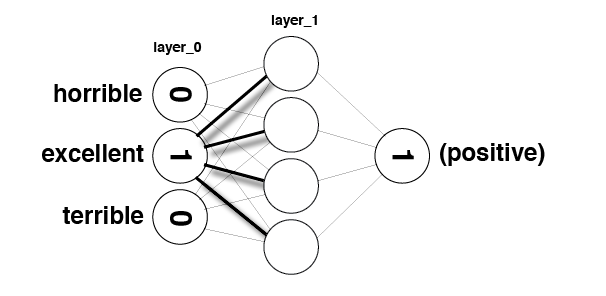

In [46]:
Image(filename='sentiment_network_sparse.png')


In [47]:
# Here we can see that in input layer we have lots of zeros and these zeros donot contribute anything to computing layer 1
# the result would be same if we only considered the nodes with value 1 while calculating hidden layer. This would increase the speed of our network significantly




## Project 5: Making our Network More Efficient


In [51]:
import time
import sys
import numpy as np


class SentimentAnalysisNetwork:

    def __init__(self, reviews, labels, hidden_nodes=10, learning_rate=0.10):

        """
        Create a sentimentAnalysisNetwirk with the given settings.
        Args:
          reviews(list) - list of reviews to be used for training
          lables(list) - list of positive/negative labels associated with the given review
          hidden_nodes(int) -  number of nodes to create in hidden layer
          learning_rate(float) - learning rate to use for training(default = 0.10)

        """
        np.random.seed(1)

        # preprocess the reviews-> array and labels(convert positive->1 and negative->0)
        self.pre_process_data(reviews=reviews, labels=labels)

        # Buid the neural network with the above settings
        self.init_network(input_nodes=self.review_vocab_size, hidden_nodes=hidden_nodes, output_nodes=1,
                          learning_rate=learning_rate)

    def pre_process_data(self, reviews, labels):

        # populate review_vocab with all the words from given reviews. This would be a huge list
        review_vocab = set()
        for review in reviews:
            for word in review.split():
                review_vocab.add(word)

        # convert the review_vocab to set so that we can access word via index and create a mapping
        self.review_vocab = list(review_vocab)

        # populate label_vocab with all the labels
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)

        # convert the label_vocab to list so that we can access using indices
        self.label_vocab = list(label_vocab)

        # store the length of review and label vocab
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)

        # create a dictionary that will map all the words in self.vocab_review to their positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i

        # create a dictionary of labels mapped to index
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = 1

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        """
        Initializes the Neural Netowrk with the provided settings
        Args:
          input_nodes(int) - size of input node
          hidden_nodes(int) - size of hidden node
          output_nodes(int) - size of output_node
          learning_rate(float) - learning rate to train the neural network
        """

        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # store the learning rate
        self.learning_rate = learning_rate

        # initialize the weights between the input_layer and hidden_layer
        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))

        # initialize the weights between hidden_node and
        # here loc  = mean, scale = standard deviation
        self.weights_1_2 = np.random.normal(loc=0.0, scale=self.hidden_nodes ** -0.5,
                                            size=(self.hidden_nodes, self.output_nodes))

        self.layer_1 = np.zeros((1,hidden_nodes))
    
    def get_target_for_label(self, label):
        if label == 'POSITIVE':
            return 1
        else:
            return 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_output_2_derivative(self, output):
        return output * (1 - output)

    def train(self, training_reviews_raw, training_labels):
        
        training_reviews  = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split():
                if word in self.word2index.keys():
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))
            
        # make sure we have a matching number of reviews and labels
        assert (len(training_reviews) == len(training_labels))

        # keep track of correct predictions to display accuracy during training
        correct_so_far = 0

        # remember the time when we started time statistics
        start = time.time()

        # loop through alll the given reviews and run a forward pass and then backward pass
        # updating weights for every item
        for i in range(len(training_reviews)):

            # get the next review and its correct_label
            review = training_reviews[i]
            label = training_labels[i]

            #### forward pass
            self.layer_1 *= 0 
            for index in review:
                self.layer_1 +=self.weights_0_1[index]
            # hidden layer
            # output layer
            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))
            # ouput error
            layer_2_error = layer_2 - self.get_target_for_label(label)
            # output error is difference between desired output and actual output

            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)  # errors propagated to the hidden layer
            layer_1_delta = layer_1_error  # hidden layer gradients - no nonlinearity so its the same as the error

            # update the weights
            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate  # update hidden to output weights
            # with gradient step
            # only update the weights that were used in forward pass
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate
            # hidden weights with gradient step

            # keep track of correct predictions
            if layer_2 >= 0.5 and label == 'POSITIVE':
                correct_so_far += 1
            elif layer_2 < 0.5 and label == 'NEGATIVE':
                correct_so_far += 1

            # for debugging purposes, print out our prediction accuracy and speed
            # thorughout the training process
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            
            if i % 2500 == 0:
                sys.stdout.write(f'\nProgress:{str(100 * i / float(len(training_reviews)))[:4]} %'
                             f' Speed(reviews/sec): {str(reviews_per_second)[:4]}'
                             f' Correct: {correct_so_far} Trained: {i + 1}'
                             f' Training_accuracy: {str(correct_so_far * 100 / float(1 + i))[:3]}'
                             )

    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predit the label for the given testing reviews
        and uses the test_labels to calcualte the accuracy of those prodections.
        """
        # keep track of how many correct predictions we make
        correct = 0

        # log time to calculate number of reviews processed per second
        start = time.time()

        # loop through each  of the given review and call run to predict its label
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if pred == testing_labels[i]:
                correct += 1

            # for debug purpose print out our prediction accuracy and speed
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            if(i % 2500 == 0):
                print("\rProgress:" + str(100 * i / float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i + 1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i + 1))[:4] + "%")

    def run(self, review):
        """
        Returns a positive or negative prediction for the given review
        """

        # run a forward pass like in the train function
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split():
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]
            

        # hidden layer
#         layer_1 = self.layer_0.dot(self.weights_0_1)

        # output layer
        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

        if layer_2[0] >= 0.5:
            return "POSITIVE"
        else:
            return "NEGATIVE"


In [52]:
# training with lower lr
mlp = SentimentAnalysisNetwork(reviews_raw[:-1000],labels_raw[:-1000], learning_rate=0.01)
mlp.train(reviews_raw[:-1000],labels_raw[:-1000])
# trainin speed boosted


Progress:0.0 % Speed(reviews/sec): 0.0 Correct: 1 Trained: 1 Training_accuracy: 100
Progress:10.4 % Speed(reviews/sec): 1492 Correct: 1948 Trained: 2501 Training_accuracy: 77.
Progress:20.8 % Speed(reviews/sec): 1451 Correct: 4011 Trained: 5001 Training_accuracy: 80.
Progress:31.2 % Speed(reviews/sec): 1450 Correct: 6131 Trained: 7501 Training_accuracy: 81.
Progress:41.6 % Speed(reviews/sec): 1460 Correct: 8286 Trained: 10001 Training_accuracy: 82.
Progress:52.0 % Speed(reviews/sec): 1456 Correct: 10446 Trained: 12501 Training_accuracy: 83.
Progress:62.5 % Speed(reviews/sec): 1456 Correct: 12567 Trained: 15001 Training_accuracy: 83.
Progress:72.9 % Speed(reviews/sec): 1453 Correct: 14692 Trained: 17501 Training_accuracy: 83.
Progress:83.3 % Speed(reviews/sec): 1449 Correct: 16883 Trained: 20001 Training_accuracy: 84.
Progress:93.7 % Speed(reviews/sec): 1446 Correct: 19064 Trained: 22501 Training_accuracy: 84.

In [53]:
mlp.test(reviews_raw[:-1000],labels_raw[:-1000])


Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Tested:1 Testing Accuracy:100.%
Progress:10.4% Speed(reviews/sec):2775. #Correct:2253 #Tested:2501 Testing Accuracy:90.0%
Progress:20.8% Speed(reviews/sec):2711. #Correct:4476 #Tested:5001 Testing Accuracy:89.5%
Progress:31.2% Speed(reviews/sec):2710. #Correct:6702 #Tested:7501 Testing Accuracy:89.3%
Progress:41.6% Speed(reviews/sec):2846. #Correct:8942 #Tested:10001 Testing Accuracy:89.4%
Progress:52.0% Speed(reviews/sec):2927. #Correct:11194 #Tested:12501 Testing Accuracy:89.5%
Progress:62.5% Speed(reviews/sec):2989. #Correct:13447 #Tested:15001 Testing Accuracy:89.6%
Progress:72.9% Speed(reviews/sec):3035. #Correct:15717 #Tested:17501 Testing Accuracy:89.8%
Progress:83.3% Speed(reviews/sec):3062. #Correct:18047 #Tested:20001 Testing Accuracy:90.2%
Progress:93.7% Speed(reviews/sec):3086. #Correct:20361 #Tested:22501 Testing Accuracy:90.4%
